# ***`Alcohol Consumption Habit Modeling with LIWC`***
---
- https://github.com/ianozsvald/data_science_delivered/blob/master/ml_creating_correct_capable_classifiers.ipynb
- https://scikit-learn.org/1.1/auto_examples/model_selection/plot_learning_curve.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html
- https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/#:~:text=Information%20gain%20calculates%20the%20reduction,context%20of%20the%20target%20variable.
- https://www.ritchieng.com/machinelearning-learning-curve/

## Base Libraries

In [1]:
# Data manipulation
import pandas as pd
# enable to see all columns:
pd.set_option('display.max_columns', None)

import numpy as np

# Visualization
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

import seaborn as sns
sns.set_style('whitegrid')

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import missingno as msno

# XAI
import shap

# ML
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer, balanced_accuracy_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Optimisation
import optuna

# ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Helper Functions

In [2]:
from helper_functions import *

The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.


## 1) ***Read Data***
---

In [3]:
df = pd.read_parquet("merged_data/df_cascade_consumption_liwc.parquet")
print(f"Duplicates: {df.duplicated().sum()}")
print(f"Missing values: {df.isnull().sum().sum()}")
print()
display_data_shape(df)
df.head()

Duplicates: 0
Missing values: 0

Data dimensions:
---------------------------------------------------------------------
 - Number of observations: 1,185
 - Number of columns: 97


userid  smoking_status  alcohol_status  \
0  ba4d96426226699b8c511ce0bee75941            True            True   
1  1a388284961e77942bae7a0ead109eea           False            True   
2  ec539b2398f80d1f395ba4cc06c230a7           False           False   
3  0e0b122ce777606ae73dd055d76fc1c7           False           False   
4  58bcb86a962fc98d2feb5e3562ac45c0            True            True   

   drug_status    WC  Analytic  Clout  Authentic   Tone    WPS  Sixltr    Dic  \
0         True  7197     43.31  59.44      60.57  44.88  19.94   11.39  82.03   
1        False  4025     35.20  73.85      50.29  70.64   8.67   10.71  81.66   
2        False  2741     51.55  71.78      53.26  90.03  13.77   14.19  86.25   
3        False     5      8.19  50.00       1.00   1.00   1.67   20.00  80.00   
4        False  1548     48.77  42.07      79.91  77.98   8.70   12.21  86.95   

   function.  pronoun  ppron     i    we   you  shehe  they  ipron  article  \
0      45.07    15.92  11.45  6.27  0.42  3.49   0.51  0.76   4.47     4.15   
1      46.26    18.76  14.16  7.08  0.77  5.47   0.40  0.45   4.60     4.05   
2      51.77    14.52  10.69  4.85  1.31  2.59   1.61  0.33   3.83     5.25   
3      40.00     0.00   0.00  0.00  0.00  0.00   0.00  0.00   0.00     0.00   
4      48.45    15.44  10.01  7.69  0.65  1.03   0.32  0.32   5.43     5.56   

    prep  auxverb  adverb   conj  negate   verb   adj  compare  interrog  \
0   9.11     7.95    4.71   5.46    2.08  17.13  4.59     1.70      1.56   
1   8.99     8.52    4.57   5.44    1.57  17.89  5.19     1.79      1.49   
2  12.29    10.40    5.18   5.87    1.53  19.41  4.38     0.95      1.64   
3   0.00    20.00    0.00  20.00    0.00  20.00  0.00     0.00      0.00   
4  10.53     9.63    5.81   4.65    1.49  18.22  5.17     1.61      1.36   

   number  quant  affect  posemo  negemo   anx  anger   sad  social  family  \
0    2.15   1.76    7.54    4.28    3.24  0.24   1.29  0.58   11.17    1.36   
1    4.89   1.27    9.69    5.96    3.58  0.37   1.57  0.50   12.50    0.42   
2    1.35   1.50    7.88    5.87    2.01  0.04   0.36  0.84   10.65    0.47   
3    0.00   0.00   20.00    0.00   20.00  0.00   0.00  0.00    0.00    0.00   
4    3.68   2.00    6.91    4.84    2.00  0.19   0.45  0.26    7.69    0.90   

   friend  female  male  cogproc  insight  cause  discrep  tentat  certain  \
0    0.53    1.29  0.83    10.56     2.32   1.13     1.90    2.24     1.35   
1    0.75    0.65  0.72    10.01     1.91   1.61     2.09    2.19     1.69   
2    0.40    1.39  0.80     8.79     1.64   0.73     1.64    2.19     1.64   
3    0.00    0.00  0.00     0.00     0.00   0.00     0.00    0.00     0.00   
4    0.26    0.32  0.84     9.04     1.42   0.97     2.20    2.13     1.36   

   differ  percept   see  hear  feel    bio  body  health  sexual  ingest  \
0    3.36     3.06  1.14  0.60  1.08   3.97  1.28    1.18    0.50    0.71   
1    2.11     3.38  1.49  0.92  0.62   4.47  1.86    0.70    0.55    0.87   
2    2.26     2.48  1.28  0.40  0.66   2.59  0.58    0.95    0.00    0.51   
3    0.00     0.00  0.00  0.00  0.00  20.00  0.00    0.00    0.00   20.00   
4    2.07     2.78  1.10  0.71  0.58   3.49  0.90    0.97    0.00    1.49   

   drives  affiliation  achieve  power  reward  risk  focuspast  focuspresent  \
0    7.25         2.47     0.82   2.18    1.93  0.43       2.90         12.95   
1    7.18         2.78     0.75   2.01    1.96  0.37       2.53         12.45   
2    7.66         3.06     0.91   1.68    1.97  0.29       5.18         12.81   
3    0.00         0.00     0.00   0.00    0.00  0.00       0.00         20.00   
4    6.65         2.26     1.61   1.68    1.87  0.26       3.49         13.44   

   focusfuture  relativ  motion  space  time  work  leisure  home  money  \
0         1.74    13.07    2.14   5.66  5.29  0.76     1.46  0.79   0.76   
1         2.21    12.42    1.91   5.84  4.89  0.77     1.59  0.17   0.22   
2         3.47    15.98    2.59   6.09  7.59  1.42     1.79  

## 2) ***Data Preperation***
---

- Filter based on word count (WC):

Minimum word count: 1


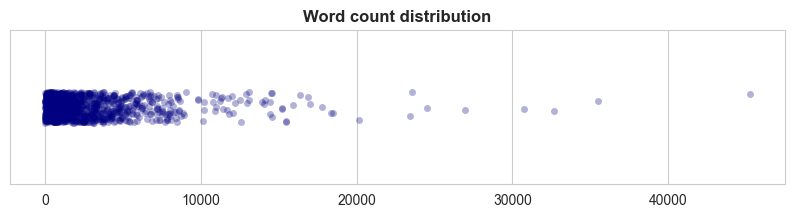

In [4]:
plt.figure(figsize=(10, 2))
plt.title('Word count distribution', weight='bold')
sns.stripplot(
        x='WC', data=df,
        jitter=True, alpha=.3,
        color='navy'
)
plt.xlabel("")
print(f"Minimum word count: {df['WC'].min()}")

In [4]:
#threshold = int(input("Enter the minimum word count: ")) # 50
df = df.query('WC >= 50')
display_data_shape(df)

Data dimensions:
---------------------------------------------------------------------
 - Number of observations: 1,140
 - Number of columns: 97


- Train-test-split:

In [5]:
consumption = [c for c in df.columns if c.endswith('status')]
liwc        = [
        c for c in df.columns
            if c not in consumption
            and c != 'userid'
    ]

print(f"# features in liwc: {len(liwc)}")
print(f"Targets: {consumption}")

# features in liwc: 93
Targets: ['smoking_status', 'alcohol_status', 'drug_status']


In [6]:
from sklearn.model_selection import train_test_split

X ,y = df[liwc], df['alcohol_status'].astype(int)

X_train, X_test, \
    y_train, y_test = train_test_split(
                             X, y, test_size=0.2, stratify=y, random_state=42
)

In [30]:
print(y.value_counts(normalize=True))
print(y_train.value_counts(normalize=True))

alcohol_status
0    0.514912
1    0.485088
Name: proportion, dtype: float64
alcohol_status
0    0.515351
1    0.484649
Name: proportion, dtype: float64


## 3) ***EDA & Feature Selection***
---

### 3.1) Target Distribution:

In [47]:
plot_target_ratios(
    df = df,
    targets = ['alcohol_status'],
)

### 3.2) Variance Analysis:

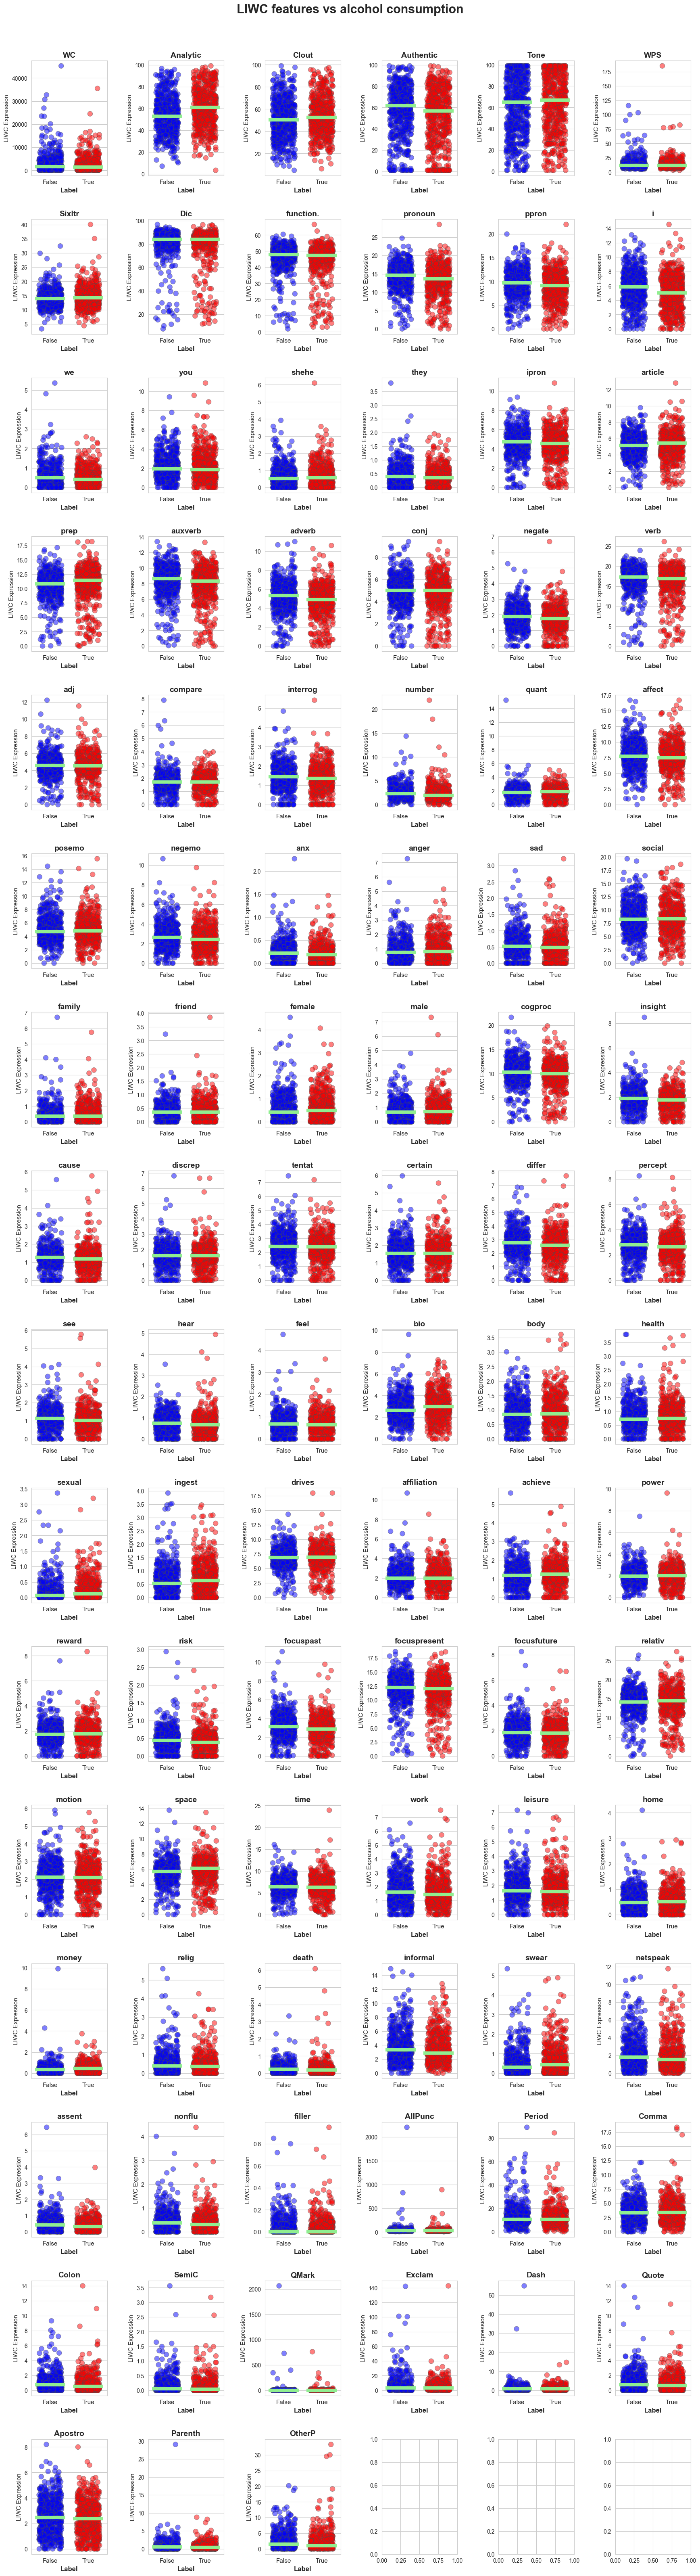

In [28]:
plot_continuous_features_target(
    df = df,
    features = liwc,
    target = 'alcohol_status',
    title = 'LIWC features vs alcohol consumption'
)

### 3.3) Mann-Whitney-U

In [7]:
print("Test #1:")

mwu_features_005_df = mannwhitney_adjusted(
    data     = pd.concat([X_train, y_train], axis=1),
    features = liwc,
    target   = 'alcohol_status',
    alpha    = 0.05
)
mwu_features_005_adj = mwu_features_005_df['feature'].tolist()
print(mwu_features_005_adj)
display(mwu_features_005_df.T)

Test #1:
42 out of 93 features are significant with respect to alcohol_status after p-value adjustment:
['Analytic', 'number', 'i', 'ppron', 'space', 'Colon', 'pronoun', 'assent', 'swear', 'adverb', 'anx', 'prep', 'money', 'AllPunc', 'ingest', 'sexual', 'bio', 'OtherP', 'insight', 'differ', 'negate', 'Quote', 'we', 'hear', 'work', 'auxverb', 'interrog', 'negemo', 'article', 'focuspast', 'Authentic', 'see', 'nonflu', 'they', 'risk', 'sad', 'cause', 'shehe', 'cogproc', 'death', 'verb', 'ipron']


0       1       2       3       4       5        6   \
feature           Analytic  number       i   ppron   space   Colon  pronoun   
adjusted_p_value       0.0     0.0  0.0001  0.0004  0.0004  0.0004   0.0005   

                      7       8       9       10      11     12       13  \
feature           assent   swear  adverb     anx    prep  money  AllPunc   
adjusted_p_value  0.0006  0.0009   0.001  0.0012  0.0013  0.002   0.0024   

                      14      15      16      17       18      19      20  \
feature           ingest  sexual     bio  OtherP  insight  differ  negate   
adjusted_p_value  0.0026  0.0026  0.0026  0.0026   0.0043  0.0043  0.0043   

                      21     22      23      24       25        26      27  \
feature            Quote     we    hear    work  auxverb  interrog  negemo   
adjusted_p_value  0.0085  0.009  0.0181  0.0203    0.021    0.0233  0.0233   

                       28         29         30      31      32      33  \
feature           article  focuspast  Authentic     see  nonflu    they   
adjusted_p_value   0.0233     0.0236     0.0243  0.0253  0.0253  0.0267   

                      34      35      36     37       38      39      40  \
feature             risk     sad   cause  shehe  cogproc   death    verb   
adjusted_p_value  0.0283  0.0305  0.0333  0.036   0.0361  0.0419  0.0436   

                      41  
feature            ipron  
adjusted_p_value  0.0448

In [8]:
print("Test #1:")

mwu_features_005_df = mannwhitney(
    data     = pd.concat([X_train, y_train], axis=1),
    features = liwc,
    target   = 'alcohol_status',
    alpha    = 0.05
)
mwu_features_005 = mwu_features_005_df['feature'].tolist()
print(mwu_features_005)
display(mwu_features_005_df.T)

Test #1:
46 out of 93 features are significant with respect to alcohol_status based on raw p-values:
['Analytic', 'space', 'i', 'ppron', 'number', 'Colon', 'pronoun', 'assent', 'swear', 'anx', 'adverb', 'prep', 'money', 'AllPunc', 'bio', 'ingest', 'sexual', 'OtherP', 'differ', 'insight', 'negate', 'Quote', 'we', 'hear', 'work', 'auxverb', 'interrog', 'negemo', 'article', 'focuspast', 'Authentic', 'see', 'nonflu', 'they', 'risk', 'sad', 'cause', 'shehe', 'cogproc', 'death', 'verb', 'ipron', 'percept', 'netspeak', 'Parenth', 'function.']


0      1    2      3       4      5        6       7       8   \
feature  Analytic  space    i  ppron  number  Colon  pronoun  assent   swear   
p_value       0.0    0.0  0.0    0.0     0.0    0.0      0.0  0.0001  0.0001   

             9       10      11      12       13      14      15      16  \
feature     anx  adverb    prep   money  AllPunc     bio  ingest  sexual   
p_value  0.0001  0.0001  0.0002  0.0003   0.0004  0.0004  0.0005  0.0005   

             17      18       19      20     21      22      23      24  \
feature  OtherP  differ  insight  negate  Quote      we    hear    work   
p_value  0.0005  0.0009    0.001   0.001  0.002  0.0022  0.0047  0.0054   

              25        26      27       28         29         30      31  \
feature  auxverb  interrog  negemo  article  focuspast  Authentic     see   
p_value   0.0059     0.007  0.0071   0.0073     0.0076     0.0081  0.0089   

             32      33      34      35      36      37       38     39  \
feature  nonflu    they    risk     sad   cause   shehe  cogproc  death   
p_value   0.009  0.0098  0.0106  0.0118  0.0133  0.0147   0.0151  0.018   

             40      41       42        43       44         45  
feature    verb   ipron  percept  netspeak  Parenth  function.  
p_value  0.0192  0.0202   0.0349    0.0356   0.0449     0.0453

## 4) ***Target Variable Modeling***
---
### 4.0) ***`DummyClassifier as Baseline`***

In [10]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dummy_clf = DummyClassifier(strategy="stratified")

dummy_clf.fit(X_train, y_train)

y_pred_train = dummy_clf.predict(X_train)
y_pred_test = dummy_clf.predict(X_test)

classification_reports(
    model = dummy_clf,
    X_train = X_train,
    y_train = y_train,
    X_test = X_test,
    y_test = y_test,
)

Classification Reports :
__________________________________________________________________

- Train Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



- Test Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


### 4.1) ***`LogReg`***
- Optimize regularitaion value:

In [11]:
from sklearn.linear_model import LogisticRegression


# create pipeline
logreg_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(penalty='l1', solver='liblinear', max_iter=100_000)) #1_000
])

# create parameter grid
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100]
}

# Create a balanced accuracy scorer
balanced_acc_scorer = make_scorer(balanced_accuracy_score)

# Define a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Create GridSearchCV object
logreg_cv = GridSearchCV(
                    estimator  = logreg_pipe,
                    param_grid = param_grid,
                    scoring    = balanced_acc_scorer,
                    cv         = stratified_kfold,
                    n_jobs     = -1,
                    verbose    = 1
)

# fit
logreg_cv.fit(
    X_train[mwu_features_005_adj],
    y_train
)

# Best model, parameters, and scores
print("Best Parameters:", logreg_cv.best_params_)
print("Best Cross-Validation Score:", logreg_cv.best_score_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


Best Parameters: {'logreg__C': 1}
Best Cross-Validation Score: 0.66345314850634


- Evaluate:

In [12]:
best_logreg = logreg_cv.best_estimator_

classification_reports(
    model   = best_logreg,
    X_train = X_train[mwu_features_005_adj],
    X_test  = X_test[mwu_features_005_adj],
    y_train = y_train,
    y_test  = y_test
)

Classification Reports :
__________________________________________________________________

- Train Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



- Test Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


- Coefficient interpretation:

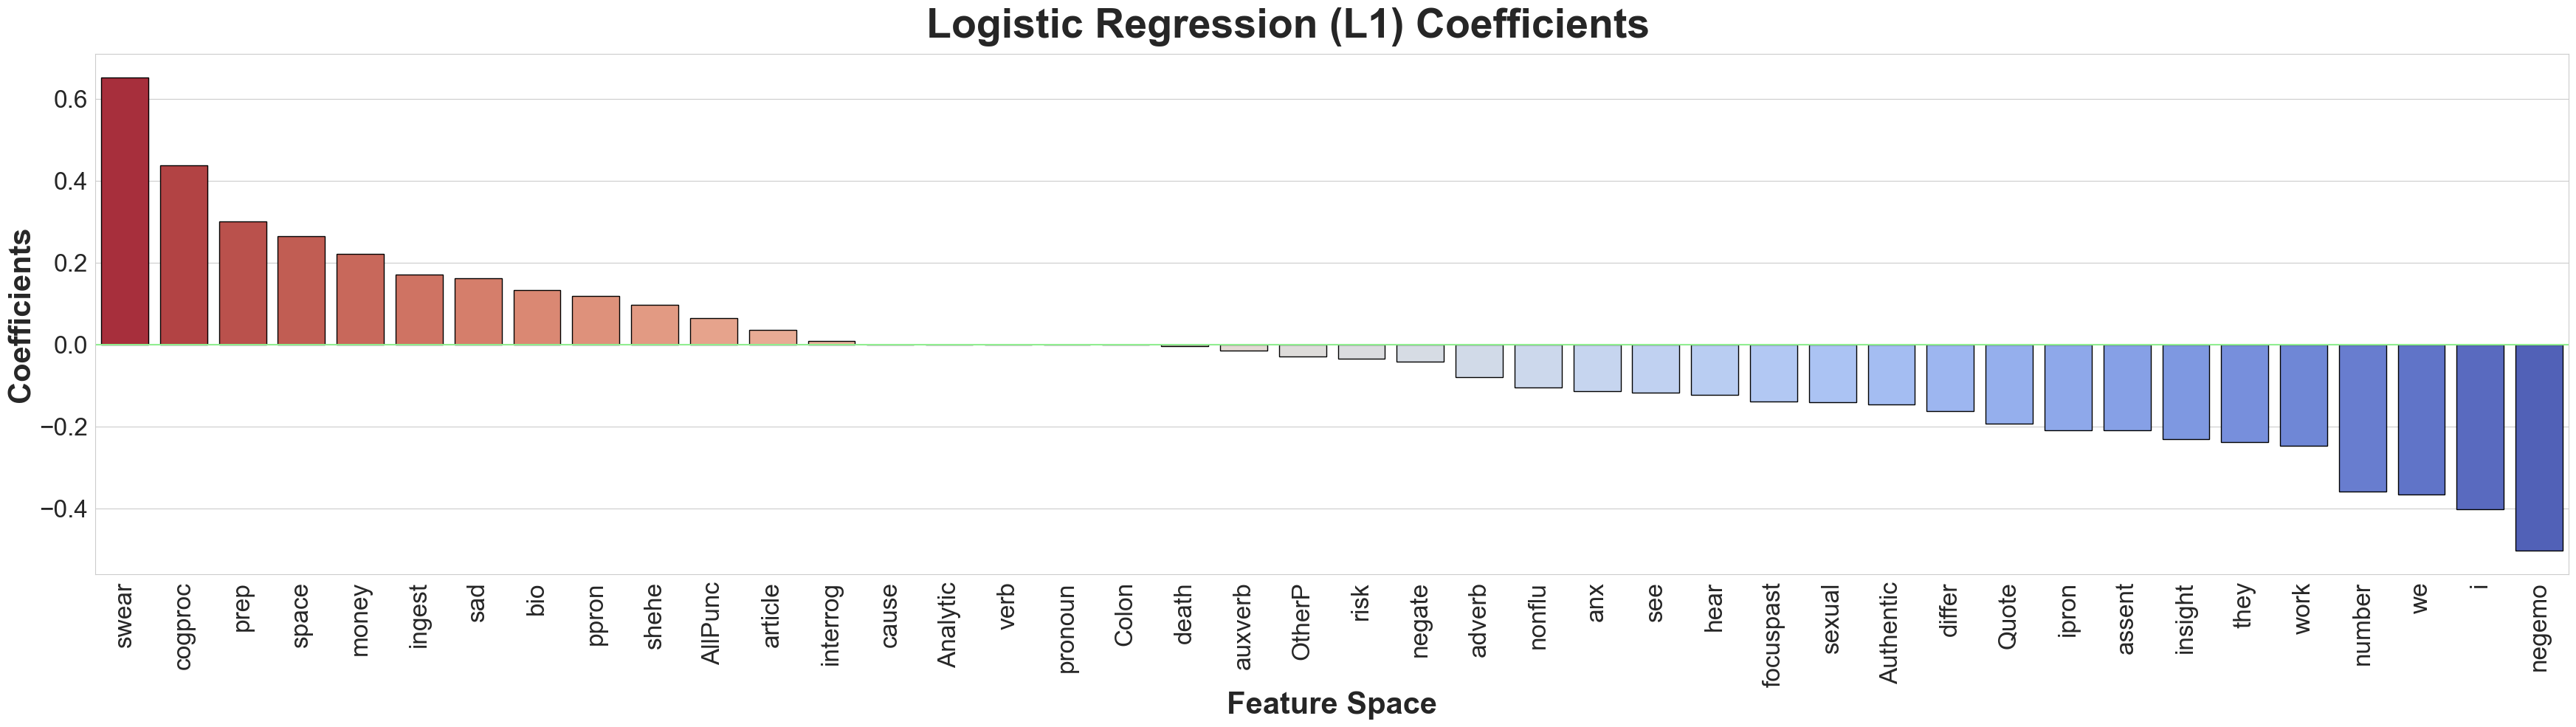

In [13]:
# refit wit best params
best_params = logreg_cv.best_params_

best_logreg_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, C=best_params['logreg__C']))
])
best_logreg_pipe.fit(
    X_train[mwu_features_005_adj],
    y_train
)

# Store the coefficients of the best logistic regression model
feature_names = X_train[mwu_features_005_adj].columns.tolist()
coefficients   = best_logreg_pipe.named_steps['logreg'].coef_[0]

coef_df = pd.DataFrame(
                data    = {'features': feature_names, 'coefficients': coefficients},
                columns = ['features', 'coefficients']
                ).sort_values(by='coefficients', ascending=False)#\
                   #.query('abs(coefficients) >= 0.25')

# Plot the coefficients
sns.set_style('whitegrid')

fig = plt.figure(figsize=(35, 10))
fig.suptitle('Logistic Regression (L1) Coefficients', weight='bold', fontsize=40)
sns.barplot(
    y='coefficients', x='features',
    data=coef_df,
    palette='coolwarm_r',
    edgecolor='black',
)
plt.xticks(rotation=90);
plt.xlabel("Feature Space", weight='bold', fontsize=30)
plt.ylabel("Coefficients", weight='bold', fontsize=30)
# increase size of xticklabels
plt.tick_params(axis='x', labelsize=24)
plt.tick_params(axis='y', labelsize=24)
# horizonzal line at 0
plt.axhline(y=0, color='lightgreen', linestyle='-')
fig.tight_layout()
plt.show();

---
- `Coefficient Sign (Positive or Negative):`
    - ***Positive Coefficients:*** A positive coefficient suggests that as the feature value increases, the probability of the target variable being in the positive class increases. For binary classification, this means that higher values of the feature make the positive outcome more likely.
    - ***Negative Coefficients:*** Conversely, a negative coefficient indicates that as the feature value increases, the probability of the target variable being in the positive class decreases.
#
- `Coefficient Magnitude:`
    - The magnitude (or absolute value) of the coefficient indicates the strength of the association. Larger absolute values signify a stronger influence on the target variable.
#
- > ***`-> Focus on absolute coefficient values for feature selection!`***
---

- Feature selection:

In [21]:
logreg_features_025  = coef_df[abs(coef_df['coefficients']) >= 0.25]['features'].tolist()
logreg_features_0325 = coef_df[abs(coef_df['coefficients']) >= 0.325]['features'].tolist()
logreg_features_05   = coef_df[abs(coef_df['coefficients']) >= 0.5]['features'].tolist()

print(f"# features: {len(logreg_features_025)}")
print(logreg_features_025)
print()
print(f"# features: {len(logreg_features_0325)}")
print(logreg_features_0325)
print()
print(f"# features: {len(logreg_features_05)}")
print(logreg_features_05)

# features: 39
['cogproc', 'drives', 'swear', 'affect', 'Tone', 'informal', 'social', 'prep', 'percept', 'ingest', 'space', 'health', 'QMark', 'family', 'money', 'shehe', 'article', 'you', 'relativ', 'cause', 'male', 'certain', 'they', 'female', 'Authentic', 'hear', 'number', 'see', 'negemo', 'affiliation', 'bio', 'we', 'netspeak', 'differ', 'insight', 'tentat', 'power', 'posemo', 'Dic']

# features: 26
['cogproc', 'drives', 'swear', 'affect', 'Tone', 'informal', 'social', 'prep', 'percept', 'ingest', 'space', 'health', 'hear', 'number', 'see', 'negemo', 'affiliation', 'bio', 'we', 'netspeak', 'differ', 'insight', 'tentat', 'power', 'posemo', 'Dic']

# features: 17
['cogproc', 'drives', 'swear', 'affect', 'Tone', 'informal', 'social', 'prep', 'percept', 'ingest', 'netspeak', 'differ', 'insight', 'tentat', 'power', 'posemo', 'Dic']


### 4.2) ***`XGBoost`***
#### 4.2.1) ***XGBoost - Entire Feature Space:***

In [16]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

- Optimize:

In [77]:
def objective(trial):
    # Hyperparameter suggestions
    n_estimators     = trial.suggest_int("n_estimators", 100, 190)
    max_depth        = trial.suggest_int("max_depth", 2, 3)
    min_child_weight = trial.suggest_int("min_child_weight", 1, 9)
    subsample        = trial.suggest_loguniform('subsample', 0.001, 1.0)
    colsample_bytree = trial.suggest_loguniform('colsample_bytree', 0.001, 1.0)
    learning_rate    = trial.suggest_loguniform('learning_rate', 0.001, 0.3)
    reg_alpha        = trial.suggest_loguniform('reg_alpha', 1.0, 10)

    # XGBoost model
    model = XGBClassifier(
                    n_estimators     = n_estimators,
                    max_depth        = max_depth,
                    min_child_weight = min_child_weight,
                    subsample        = subsample,
                    colsample_bytree = colsample_bytree,
                    learning_rate    = learning_rate,
                    reg_alpha        = reg_alpha,
                    eval_metric      = 'logloss',
                    random_state     = 42,
    )

    # Balanced accuracy scorer for cross-validation
    bal_acc_scorer = make_scorer(balanced_accuracy_score)

    # initialize StratifiedKFold
    stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Cross-validation with F1 score
    score = cross_val_score(
                        estimator = model,
                        X         = X_train,
                        y         = y_train,
                        n_jobs    = -1,
                        cv        = stratified_cv,
                        scoring   = bal_acc_scorer
    ).mean()

    return score

# Create Study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=33, timeout=4000)

print(99*'_')
print('Best trial:', study.best_trial.params)

[I 2024-01-12 17:09:15,716] A new study created in memory with name: no-name-12a5bfa0-fefa-47f1-92d8-fe9e1eff5859


[I 2024-01-12 17:09:16,245] Trial 0 finished with value: 0.5 and parameters: {'n_estimators': 163, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.0010192427280831075, 'colsample_bytree': 0.8726435163853657, 'learning_rate': 0.07497558918312655, 'reg_alpha': 2.3011040503840645}. Best is trial 0 with value: 0.5.
[I 2024-01-12 17:09:16,680] Trial 1 finished with value: 0.5993128089404685 and parameters: {'n_estimators': 160, 'max_depth': 2, 'min_child_weight': 9, 'subsample': 0.09197329366310641, 'colsample_bytree': 0.12574851378514018, 'learning_rate': 0.039247346695169896, 'reg_alpha': 4.693958671714329}. Best is trial 1 with value: 0.5993128089404685.
[I 2024-01-12 17:09:17,111] Trial 2 finished with value: 0.5 and parameters: {'n_estimators': 179, 'max_depth': 3, 'min_child_weight': 7, 'subsample': 0.021894437018954487, 'colsample_bytree': 0.40198719384553094, 'learning_rate': 0.11593776434518344, 'reg_alpha': 1.9090683086180587}. Best is trial 1 with value: 0.5993128089404685.

___________________________________________________________________________________________________
Best trial: {'n_estimators': 151, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.1301952296312875, 'colsample_bytree': 0.13201901654836243, 'learning_rate': 0.04164528977368713, 'reg_alpha': 3.3086720897806927}


- Refit model with best parameters:
    - Best trial: {'n_estimators': 151, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.1301952296312875, 'colsample_bytree': 0.13201901654836243, 'learning_rate': 0.04164528977368713, 'reg_alpha': 3.3086720897806927}


In [23]:
#best_params = study.best_trial.params
best_params = {'n_estimators': 151, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.1301952296312875, 'colsample_bytree': 0.13201901654836243, 'learning_rate': 0.04164528977368713, 'reg_alpha': 3.3086720897806927}

# Create XGBoost model with best parameters
xgb_all = XGBClassifier(
                n_estimators     = best_params['n_estimators'],
                max_depth        = best_params['max_depth'],
                min_child_weight = best_params['min_child_weight'],
                subsample        = best_params['subsample'],
                colsample_bytree = best_params['colsample_bytree'],
                learning_rate    = best_params['learning_rate'],
                reg_alpha        = best_params['reg_alpha'],
                #scale_pos_weight = weight_alc,
                eval_metric      = 'logloss',
                random_state     = 42,
)

# Fit model
xgb_all.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.13201901654836243, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.04164528977368713,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=151, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

- Evaluate:

In [80]:
classification_reports(
    model   = xgb_all,
    X_train = X_train,
    X_test  = X_test,
    y_train = y_train,
    y_test  = y_test
)

Classification Reports :
__________________________________________________________________

- Train Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



- Test Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


- Feature Importance:

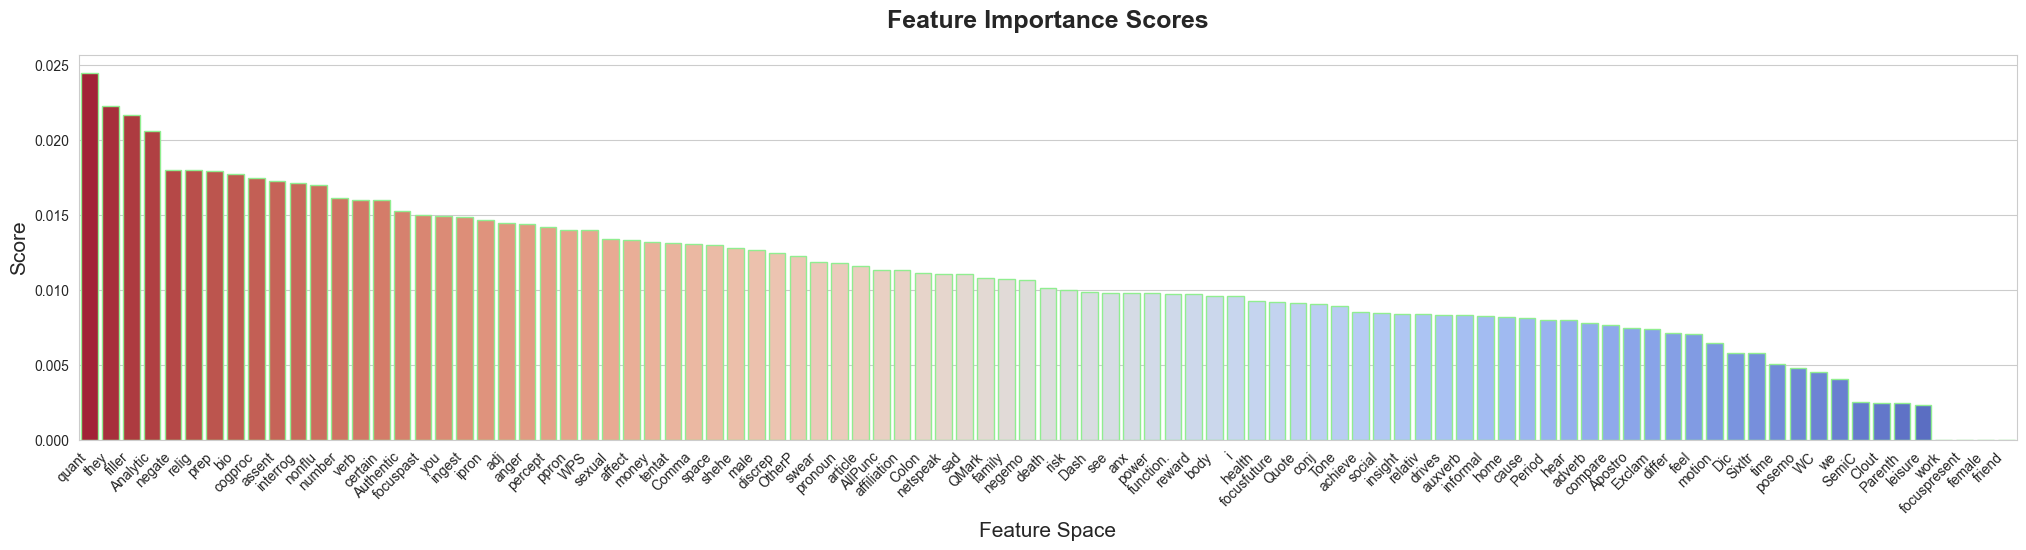

In [26]:
feature_importance_plot(
    model        = xgb_all,
    feature_names= liwc,
    figsize       = (25, 5),
    horizontal   =True
)

In [27]:
# features with importance >= 0.01
xgb_features_001 = [ f for f, i in zip(liwc, xgb_all.feature_importances_) if i >= 0.01 ]
print(f"# features: {len(xgb_features_001)}")
print(xgb_features_001)

# features: 47
['Analytic', 'Authentic', 'WPS', 'pronoun', 'ppron', 'you', 'shehe', 'they', 'ipron', 'article', 'prep', 'negate', 'verb', 'adj', 'interrog', 'number', 'quant', 'affect', 'negemo', 'anger', 'sad', 'family', 'male', 'cogproc', 'discrep', 'tentat', 'certain', 'percept', 'bio', 'sexual', 'ingest', 'affiliation', 'focuspast', 'space', 'money', 'relig', 'death', 'swear', 'netspeak', 'assent', 'nonflu', 'filler', 'AllPunc', 'Comma', 'Colon', 'QMark', 'OtherP']


#### 4.2.1) ***XGBoost - Recursive Feature Elimination:***

- RFE:

In [28]:
from sklearn.feature_selection import RFECV

# initialize RFECV
rfecv = RFECV(
            estimator = xgb_all,
            step      = 1,
            cv        = StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
            scoring   = 'balanced_accuracy',
            n_jobs    = -1
)

# fit RFECV on training data
rfecv.fit(
    X_train[xgb_features_001],
    y_train
)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
      estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=0.13201901654836243, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric='logloss',
                              feature_types=None, gamma=None, grow_policy=None,...
                              interaction_constraints=None,
                              learning_rate=0.04164528977368713, max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=3, max_leaves=None,
                              min_child_weight=6, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=151, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...),
      n_jobs=-1, scoring='balanced_accuracy')

- Determine optimal feature space:

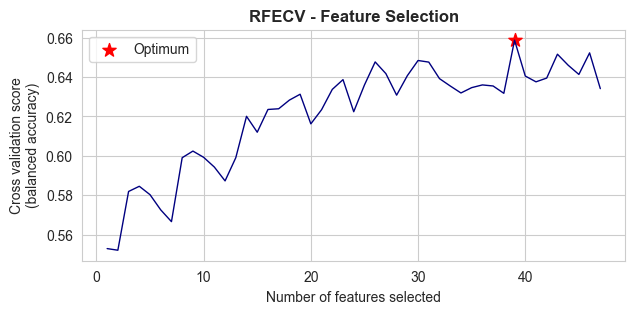

In [35]:
# Extract cross-validation scores from `cv_results_` attribute
cv_scores = rfecv.cv_results_['mean_test_score']

# determine best number of features and best score:
optimal_n_features  = np.argmax(cv_scores) + 1
optimal_score       = np.max(cv_scores)

# Plot
plt.figure(figsize=(7, 3))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score\n(balanced accuracy)")
# Highlight the point with the highest score
plt.scatter(x=optimal_n_features, y=optimal_score, color='red', s=100, marker='*', label='Optimum')
# Plot number of features VS. cross-validation scores
plt.plot(range(1, len(cv_scores) + 1), cv_scores, color='navy', linewidth=1)

plt.legend()
plt.title("RFECV - Feature Selection", weight='bold')
plt.show()

In [30]:
# Convert the rankings to a Series
feature_rankings = pd.Series(rfecv.ranking_, index=xgb_features_001)

# Filter the selected features to keep only the top n (ranking == 1)
top_n = sum(feature_rankings == 1)

# Sort the rankings and select the top 40 features
top_n_features = feature_rankings.nsmallest(top_n).index.tolist()

# Display which features were selected
print(f"# features selected: {len(top_n_features)}")
print(f"Features: {top_n_features}")

# features selected: 39
Features: ['Analytic', 'WPS', 'pronoun', 'ppron', 'you', 'they', 'ipron', 'prep', 'negate', 'verb', 'interrog', 'number', 'quant', 'negemo', 'anger', 'family', 'cogproc', 'discrep', 'tentat', 'certain', 'percept', 'bio', 'sexual', 'ingest', 'affiliation', 'focuspast', 'space', 'money', 'relig', 'death', 'swear', 'netspeak', 'assent', 'nonflu', 'filler', 'AllPunc', 'Colon', 'QMark', 'OtherP']


- Research parameter space:

In [31]:
def objective(trial):
    # Hyperparameter suggestions
    n_estimators     = trial.suggest_int("n_estimators", 100, 133)
    max_depth        = trial.suggest_int("max_depth", 2, 3)
    min_child_weight = trial.suggest_int("min_child_weight", 1, 9)
    subsample        = trial.suggest_loguniform('subsample', 0.001, 1.0)
    colsample_bytree = trial.suggest_loguniform('colsample_bytree', 0.001, 1.0)
    learning_rate    = trial.suggest_loguniform('learning_rate', 0.001, 0.3)
    reg_alpha        = trial.suggest_loguniform('reg_alpha', 1.0, 10)

    # XGBoost model
    model = XGBClassifier(
                    n_estimators     = n_estimators,
                    max_depth        = max_depth,
                    min_child_weight = min_child_weight,
                    subsample        = subsample,
                    colsample_bytree = colsample_bytree,
                    learning_rate    = learning_rate,
                    reg_alpha        = reg_alpha,
                    eval_metric      = 'logloss',
                    random_state     = 42,
    )

    # Balanced accuracy scorer for cross-validation
    bal_acc_scorer = make_scorer(balanced_accuracy_score)

    # initialize StratifiedKFold
    stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Cross-validation with F1 score
    score = cross_val_score(
                        estimator = model,
                        X         = X_train[top_n_features],
                        y         = y_train,
                        n_jobs    = -1,
                        cv        = stratified_cv,
                        scoring   = bal_acc_scorer
    ).mean()

    return score

# Create Study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=33, timeout=4000)

print(99*'_')
print('Best trial:', study.best_trial.params)

[I 2024-01-12 20:53:08,885] A new study created in memory with name: no-name-83fc44d4-ef60-49cf-b315-5973b535468e
[I 2024-01-12 20:53:09,207] Trial 0 finished with value: 0.5379244573393509 and parameters: {'n_estimators': 127, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.5147662330678622, 'colsample_bytree': 0.33749919256941685, 'learning_rate': 0.0014719997443913497, 'reg_alpha': 1.2112657736826666}. Best is trial 0 with value: 0.5379244573393509.
[I 2024-01-12 20:53:09,419] Trial 1 finished with value: 0.6419809800128948 and parameters: {'n_estimators': 123, 'max_depth': 3, 'min_child_weight': 9, 'subsample': 0.8871589959233601, 'colsample_bytree': 0.0013569919489373034, 'learning_rate': 0.20696002321168858, 'reg_alpha': 7.535473098809219}. Best is trial 1 with value: 0.6419809800128948.
[I 2024-01-12 20:53:09,795] Trial 2 finished with value: 0.5 and parameters: {'n_estimators': 103, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.8891664983887545, 'colsample_bytree'

___________________________________________________________________________________________________
Best trial: {'n_estimators': 119, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.9304082615112754, 'colsample_bytree': 0.15788973707596246, 'learning_rate': 0.011254049552169819, 'reg_alpha': 5.542315182426333}


- Refit:
    - Best trial: {'n_estimators': 119, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.9304082615112754, 'colsample_bytree': 0.15788973707596246, 'learning_rate': 0.011254049552169819, 'reg_alpha': 5.542315182426333}


In [32]:
best_params = {
    'n_estimators': 119, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.9304082615112754,
    'colsample_bytree': 0.15788973707596246, 'learning_rate': 0.011254049552169819, 'reg_alpha': 5.542315182426333
}

xgb = XGBClassifier(
                n_estimators     = best_params['n_estimators'],
                max_depth        = best_params['max_depth'],
                min_child_weight = best_params['min_child_weight'],
                subsample        = best_params['subsample'],
                colsample_bytree = best_params['colsample_bytree'],
                learning_rate    = best_params['learning_rate'],
                reg_alpha        = best_params['reg_alpha'],
                eval_metric      = 'logloss',
                random_state     = 42,
)

xgb.fit(
    X_train[top_n_features],
    y_train
)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.15788973707596246, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.011254049552169819,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=119, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

- Evaluate:

In [82]:
classification_reports(
    model   = xgb,
    X_train = X_train[top_n_features],
    X_test  = X_test[top_n_features],
    y_train = y_train,
    y_test  = y_test
)

Classification Reports :
__________________________________________________________________

- Train Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



- Test Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


#### 4.2.2) ***XGBoost - MannWhitney-U:***

- Optimization:

In [38]:
def objective(trial):
    # Hyperparameter suggestions
    n_estimators     = trial.suggest_int("n_estimators", 100, 190)
    max_depth        = trial.suggest_int("max_depth", 2, 3)
    min_child_weight = trial.suggest_int("min_child_weight", 1, 9)
    subsample        = trial.suggest_loguniform('subsample', 0.001, 1.0)
    colsample_bytree = trial.suggest_loguniform('colsample_bytree', 0.001, 1.0)
    learning_rate    = trial.suggest_loguniform('learning_rate', 0.001, 0.3)
    reg_alpha        = trial.suggest_loguniform('reg_alpha', 1.0, 10)

    # XGBoost model
    model = XGBClassifier(
                    n_estimators     = n_estimators,
                    max_depth        = max_depth,
                    min_child_weight = min_child_weight,
                    subsample        = subsample,
                    colsample_bytree = colsample_bytree,
                    learning_rate    = learning_rate,
                    reg_alpha        = reg_alpha,
                    eval_metric      = 'logloss',
                    random_state     = 42,
    )

    # Balanced accuracy scorer for cross-validation
    bal_acc_scorer = make_scorer(balanced_accuracy_score)

    # initialize StratifiedKFold
    stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Cross-validation with F1 score
    score = cross_val_score(
                        estimator = model,
                        X         = X_train[alcohol_mwu_features],
                        y         = y_train,
                        n_jobs    = -1,
                        cv        = stratified_cv,
                        scoring   = bal_acc_scorer
    ).mean()

    return score

# Create Study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=33, timeout=4000)

print(99*'_')
print('Best trial:', study.best_trial.params)

[I 2024-01-13 14:42:48,204] A new study created in memory with name: no-name-241491c0-91a3-4ee6-aec6-019719915851
[I 2024-01-13 14:42:52,621] Trial 0 finished with value: 0.5 and parameters: {'n_estimators': 158, 'max_depth': 3, 'min_child_weight': 9, 'subsample': 0.008796983191043519, 'colsample_bytree': 0.03557275092609089, 'learning_rate': 0.024354469698587938, 'reg_alpha': 9.4560182370483}. Best is trial 0 with value: 0.5.
[I 2024-01-13 14:42:52,961] Trial 1 finished with value: 0.5939028583709434 and parameters: {'n_estimators': 160, 'max_depth': 3, 'min_child_weight': 3, 'subsample': 0.2589894408868725, 'colsample_bytree': 0.004979780387360902, 'learning_rate': 0.017971148931994203, 'reg_alpha': 2.1367451483579583}. Best is trial 1 with value: 0.5939028583709434.
[I 2024-01-13 14:42:53,190] Trial 2 finished with value: 0.6634257468300022 and parameters: {'n_estimators': 105, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.08102085599064208, 'colsample_bytree': 0.71101885183

___________________________________________________________________________________________________
Best trial: {'n_estimators': 185, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.6154803464966114, 'colsample_bytree': 0.2578441717954678, 'learning_rate': 0.038955697068652595, 'reg_alpha': 1.6834622268176298}


- Refit:
  - Best trial: {'n_estimators': 185, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.6154803464966114, 'colsample_bytree': 0.2578441717954678, 'learning_rate': 0.038955697068652595, 'reg_alpha': 1.6834622268176298}


In [11]:
from xgboost import XGBClassifier

#best_params = study.best_trial.params
best_params = {
    'n_estimators': 185, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.6154803464966114,
    'colsample_bytree': 0.2578441717954678, 'learning_rate': 0.038955697068652595, 'reg_alpha': 1.6834622268176298
}


# Create XGBoost model with best parameters
xgb_mwu = XGBClassifier(
                n_estimators     = best_params['n_estimators'],
                max_depth        = best_params['max_depth'],
                min_child_weight = best_params['min_child_weight'],
                subsample        = best_params['subsample'],
                colsample_bytree = best_params['colsample_bytree'],
                learning_rate    = best_params['learning_rate'],
                reg_alpha        = best_params['reg_alpha'],
                eval_metric      = 'logloss',
                random_state     = 42,
)

# Fit model
xgb_mwu.fit(X_train[mwu_features_005_adj], y_train)

# Train and test accuracy
print("Train Accuracy:", xgb_mwu.score(X_train[mwu_features_005_adj], y_train))
print("Test Accuracy:", xgb_mwu.score(X_test[mwu_features_005_adj], y_test))

Train Accuracy: 0.8048245614035088
Test Accuracy: 0.6885964912280702


- Evaluate:

In [12]:
classification_reports(
    model   = xgb_mwu,
    X_train = X_train[mwu_features_005_adj],
    X_test  = X_test[mwu_features_005_adj],
    y_train = y_train,
    y_test  = y_test
)

Classification Reports :
__________________________________________________________________

- Train Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



- Test Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


#### 4.2.3) ***XGBoost - L1:***

In [84]:
def objective(trial):
    # Hyperparameter suggestions
    n_estimators     = trial.suggest_int("n_estimators", 100, 190)
    max_depth        = trial.suggest_int("max_depth", 2, 3)
    min_child_weight = trial.suggest_int("min_child_weight", 1, 9)
    subsample        = trial.suggest_loguniform('subsample', 0.1, 1.0)
    colsample_bytree = trial.suggest_loguniform('colsample_bytree', 0.1, 1.0)
    learning_rate    = trial.suggest_loguniform('learning_rate', 0.001, 0.3)
    reg_alpha        = trial.suggest_loguniform('reg_alpha', 3.0, 10.0)

    # XGBoost model
    model = XGBClassifier(
                    n_estimators     = n_estimators,
                    max_depth        = max_depth,
                    min_child_weight = min_child_weight,
                    subsample        = subsample,
                    colsample_bytree = colsample_bytree,
                    learning_rate    = learning_rate,
                    reg_alpha        = reg_alpha,
                    eval_metric      = 'logloss',
                    random_state     = 42,
    )

    # Balanced accuracy scorer for cross-validation
    bal_acc_scorer = make_scorer(balanced_accuracy_score)

    # initialize StratifiedKFold
    stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Cross-validation with F1 score
    score = cross_val_score(
                        estimator = model,
                        X         = X_train[logreg_features_025],
                        y         = y_train,
                        n_jobs    = -1,
                        cv        = stratified_cv,
                        scoring   = bal_acc_scorer
    ).mean()

    return score

# Create Study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=33, timeout=4000)

print(99*'_')
print('Best trial:', study.best_trial.params)

[I 2024-01-13 20:48:34,573] A new study created in memory with name: no-name-299f0a7a-1231-45f8-a9b3-b47a394ecce5
[I 2024-01-13 20:48:39,175] Trial 0 finished with value: 0.660603374167204 and parameters: {'n_estimators': 179, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 0.22817449498545483, 'colsample_bytree': 0.2401056578306056, 'learning_rate': 0.03449946856723101, 'reg_alpha': 4.497176129385069}. Best is trial 0 with value: 0.660603374167204.
[I 2024-01-13 20:48:39,443] Trial 1 finished with value: 0.6267880937029873 and parameters: {'n_estimators': 163, 'max_depth': 2, 'min_child_weight': 5, 'subsample': 0.1532300133027476, 'colsample_bytree': 0.3014726626737612, 'learning_rate': 0.023759816091490586, 'reg_alpha': 5.305061304497064}. Best is trial 0 with value: 0.660603374167204.
[I 2024-01-13 20:48:39,657] Trial 2 finished with value: 0.5125913389211262 and parameters: {'n_estimators': 121, 'max_depth': 2, 'min_child_weight': 3, 'subsample': 0.2702617847197016, 'colsample_

___________________________________________________________________________________________________
Best trial: {'n_estimators': 102, 'max_depth': 3, 'min_child_weight': 7, 'subsample': 0.5376413734847308, 'colsample_bytree': 0.8911044009305898, 'learning_rate': 0.05365622080492852, 'reg_alpha': 3.841539251291121}


- Refit:

In [85]:
best_params = study.best_trial.params

xgb_l1 = XGBClassifier(
                n_estimators     = best_params['n_estimators'],
                max_depth        = best_params['max_depth'],
                min_child_weight = best_params['min_child_weight'],
                subsample        = best_params['subsample'],
                colsample_bytree = best_params['colsample_bytree'],
                learning_rate    = best_params['learning_rate'],
                reg_alpha        = best_params['reg_alpha'],
                eval_metric      = 'logloss',
                random_state     = 42,
)

xgb_l1.fit(
    X_train[logreg_features_025],
    y_train
)

# Train and test accuracy
print("Train Accuracy:", xgb_l1.score(X_train[logreg_features_025], y_train))
print("Test Accuracy:", xgb_l1.score(X_test[logreg_features_025], y_test))

Train Accuracy: 0.8168859649122807
Test Accuracy: 0.6622807017543859


- Evaluate:

In [86]:
classification_reports(
    model   = xgb_l1,
    X_train = X_train[logreg_features_025],
    X_test  = X_test[logreg_features_025],
    y_train = y_train,
    y_test  = y_test
)

Classification Reports :
__________________________________________________________________

- Train Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



- Test Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


### 4.3) ***`LightGBM`***

In [16]:
from lightgbm import LGBMClassifier

#### 4.3.1 LGBM - MannWhitney-U

In [100]:
def objective(trial):

    # LightGBM model
    model = LGBMClassifier(
                    num_leaves        = trial.suggest_int("num_leaves", 3, 32),
                    max_depth         = trial.suggest_int("max_depth", 2, 3),
                    learning_rate     = trial.suggest_loguniform("learning_rate", 0.0001, 0.01),
                    n_estimators      = trial.suggest_int("n_estimators", 100, 300),
                    min_child_samples = trial.suggest_int("min_child_samples", 100, 200),
                    subsample         = trial.suggest_uniform("subsample", 0.1, 0.5),
                    colsample_bytree  = trial.suggest_uniform("colsample_bytree", 0.1, 1.0),
                    reg_alpha         = trial.suggest_loguniform("reg_alpha", 1e-8, 10.0),
                    reg_lambda        = trial.suggest_loguniform("reg_lambda", 1e-8, 10.0),
                    objective         = 'binary',
                    metric            = 'binary_logloss',
                    boosting_type     = 'gbdt',
                    force_col_wise    = True,
                    verbose           = -1,
                    random_state      = 42
                )

    # Balanced accuracy scorer for cross-validation
    bal_acc_scorer = make_scorer(balanced_accuracy_score)

    # Initialize StratifiedKFold
    stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Cross-validation with balanced accuracy score
    score = cross_val_score(
                        estimator = model,
                        X         = X_train[alcohol_mwu_features],
                        y         = y_train,
                        n_jobs    = -1,
                        cv        = stratified_cv,
                        scoring   = bal_acc_scorer
    ).mean()

    return score

# Create Study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=33, timeout=4000)

print(99*'_')
print('Best trial:', study.best_trial.params)

[I 2024-01-14 10:39:45,946] A new study created in memory with name: no-name-26db0d2f-7547-48c8-884b-7bdf0cdd2bcc
[I 2024-01-14 10:39:46,509] Trial 0 finished with value: 0.5 and parameters: {'num_leaves': 9, 'max_depth': 2, 'learning_rate': 0.00012281084945317712, 'n_estimators': 251, 'min_child_samples': 127, 'subsample': 0.17854175969414754, 'colsample_bytree': 0.2736135121470063, 'reg_alpha': 4.079324345509664, 'reg_lambda': 0.0009787258894100369}. Best is trial 0 with value: 0.5.
[I 2024-01-14 10:39:47,082] Trial 1 finished with value: 0.622661186331399 and parameters: {'num_leaves': 5, 'max_depth': 3, 'learning_rate': 0.0014404567871851995, 'n_estimators': 205, 'min_child_samples': 128, 'subsample': 0.18823678046195794, 'colsample_bytree': 0.4272976439418985, 'reg_alpha': 2.2388622849019016e-08, 'reg_lambda': 0.004793678843141534}. Best is trial 1 with value: 0.622661186331399.
[I 2024-01-14 10:39:47,384] Trial 2 finished with value: 0.5 and parameters: {'num_leaves': 12, 'max_de

___________________________________________________________________________________________________
Best trial: {'num_leaves': 32, 'max_depth': 3, 'learning_rate': 0.0058778455586641605, 'n_estimators': 236, 'min_child_samples': 116, 'subsample': 0.1866989303244522, 'colsample_bytree': 0.7327999887344304, 'reg_alpha': 7.460691601096536e-07, 'reg_lambda': 0.019392367554770553}


- Refit:
  - Best trial: {'num_leaves': 32, 'max_depth': 3, 'learning_rate': 0.0058778455586641605, 'n_estimators': 236, 'min_child_samples': 116, 'subsample': 0.1866989303244522, 'colsample_bytree': 0.7327999887344304, 'reg_alpha': 7.460691601096536e-07, 'reg_lambda': 0.019392367554770553}


In [17]:
#best_params = study.best_trial.params
best_params = {
    'num_leaves': 32, 'max_depth': 3, 'learning_rate': 0.0058778455586641605, 'n_estimators': 236,
    'min_child_samples': 116, 'subsample': 0.1866989303244522, 'colsample_bytree': 0.7327999887344304,
    'reg_alpha': 7.460691601096536e-07, 'reg_lambda': 0.019392367554770553
}

lgbm_mwu = LGBMClassifier(
                num_leaves        = best_params['num_leaves'],
                max_depth         = best_params['max_depth'],
                learning_rate     = best_params['learning_rate'],
                n_estimators      = best_params['n_estimators'],
                min_child_samples = best_params['min_child_samples'],
                subsample         = best_params['subsample'],
                colsample_bytree  = best_params['colsample_bytree'],
                reg_alpha         = best_params['reg_alpha'],
                reg_lambda        = best_params['reg_lambda'],
                objective         = 'binary',
                metric            = 'binary_logloss',
                boosting_type     = 'gbdt',
                force_col_wise    = True,
                verbose           = -1,
                random_state      = 42
)

lgbm_mwu.fit(
    X_train[mwu_features_005_adj],
    y_train
)

LGBMClassifier(colsample_bytree=0.7327999887344304, force_col_wise=True,
               learning_rate=0.0058778455586641605, max_depth=3,
               metric='binary_logloss', min_child_samples=116, n_estimators=236,
               num_leaves=32, objective='binary', random_state=42,
               reg_alpha=7.460691601096536e-07, reg_lambda=0.019392367554770553,
               subsample=0.1866989303244522, verbose=-1)

- Evaluate:

In [18]:
classification_reports(
    model   = lgbm_mwu,
    X_train = X_train[mwu_features_005_adj],
    X_test  = X_test[mwu_features_005_adj],
    y_train = y_train,
    y_test  = y_test
)

Classification Reports :
__________________________________________________________________

- Train Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



- Test Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


#### 4.3.2 LGBM - L1

- Optimize:

In [95]:
def objective(trial):

    # LightGBM model
    model = LGBMClassifier(
                    num_leaves        = trial.suggest_int("num_leaves", 3, 32),
                    max_depth         = trial.suggest_int("max_depth", 2, 3),
                    learning_rate     = trial.suggest_loguniform("learning_rate", 0.0001, 0.01),
                    n_estimators      = trial.suggest_int("n_estimators", 100, 300),
                    min_child_samples = trial.suggest_int("min_child_samples", 100, 200),
                    subsample         = trial.suggest_uniform("subsample", 0.1, 0.5),
                    colsample_bytree  = trial.suggest_uniform("colsample_bytree", 0.1, 1.0),
                    reg_alpha         = trial.suggest_loguniform("reg_alpha", 1e-8, 10.0),
                    reg_lambda        = trial.suggest_loguniform("reg_lambda", 1e-8, 10.0),
                    objective         = 'binary',
                    metric            = 'binary_logloss',
                    boosting_type     = 'gbdt',
                    force_col_wise    = True,
                    verbose           = -1,
                    random_state      = 42
                )

    # Balanced accuracy scorer for cross-validation
    bal_acc_scorer = make_scorer(balanced_accuracy_score)

    # Initialize StratifiedKFold
    stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Cross-validation with balanced accuracy score
    score = cross_val_score(
                        estimator = model,
                        X         = X_train[logreg_features_025],
                        y         = y_train,
                        n_jobs    = -1,
                        cv        = stratified_cv,
                        scoring   = bal_acc_scorer
    ).mean()

    return score

# Create Study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=33, timeout=4000)

print(99*'_')
print('Best trial:', study.best_trial.params)

[I 2024-01-14 10:36:27,374] A new study created in memory with name: no-name-db09556d-2ec3-418d-b279-f01af591b396
[I 2024-01-14 10:36:28,361] Trial 0 finished with value: 0.5967832581130453 and parameters: {'num_leaves': 31, 'max_depth': 3, 'learning_rate': 0.0031986876157099903, 'n_estimators': 183, 'min_child_samples': 103, 'subsample': 0.49160405539652063, 'colsample_bytree': 0.9989647301087841, 'reg_alpha': 0.42924895983549605, 'reg_lambda': 0.029315118298937345}. Best is trial 0 with value: 0.5967832581130453.
[I 2024-01-14 10:36:28,959] Trial 1 finished with value: 0.5 and parameters: {'num_leaves': 19, 'max_depth': 2, 'learning_rate': 0.00010900179097574681, 'n_estimators': 206, 'min_child_samples': 113, 'subsample': 0.2566975607610834, 'colsample_bytree': 0.49336242010521913, 'reg_alpha': 0.0004534929290877411, 'reg_lambda': 8.285865135131644}. Best is trial 0 with value: 0.5967832581130453.
[I 2024-01-14 10:36:29,226] Trial 2 finished with value: 0.5763856651622609 and paramet

___________________________________________________________________________________________________
Best trial: {'num_leaves': 19, 'max_depth': 3, 'learning_rate': 0.007126346388251348, 'n_estimators': 291, 'min_child_samples': 115, 'subsample': 0.2037439099890883, 'colsample_bytree': 0.17145236324619706, 'reg_alpha': 0.0008027715990781301, 'reg_lambda': 0.0006350259281608918}


- Refit:
  - Best trial: {'num_leaves': 19, 'max_depth': 3, 'learning_rate': 0.007126346388251348, 'n_estimators': 291, 'min_child_samples': 115, 'subsample': 0.2037439099890883, 'colsample_bytree': 0.17145236324619706, 'reg_alpha': 0.0008027715990781301, 'reg_lambda': 0.0006350259281608918}


In [130]:
#best_params = study.best_trial.params
best_params = {
    'num_leaves': 19, 'max_depth': 3, 'learning_rate': 0.007126346388251348, 'n_estimators': 291,
    'min_child_samples': 115, 'subsample': 0.2037439099890883, 'colsample_bytree': 0.17145236324619706,
    'reg_alpha': 0.0008027715990781301, 'reg_lambda': 0.0006350259281608918
}


lgbm_l1 = LGBMClassifier(
                num_leaves        = best_params['num_leaves'],
                max_depth         = best_params['max_depth'],
                learning_rate     = best_params['learning_rate'],
                n_estimators      = best_params['n_estimators'],
                min_child_samples = best_params['min_child_samples'],
                subsample         = best_params['subsample'],
                colsample_bytree  = best_params['colsample_bytree'],
                reg_alpha         = best_params['reg_alpha'],
                reg_lambda        = best_params['reg_lambda'],
                objective         = 'binary',
                metric            = 'binary_logloss',
                boosting_type     = 'gbdt',
                force_col_wise    = True,
                verbose           = -1,
                random_state      = 42
)

lgbm_l1.fit(
    X_train[logreg_features_025],
    y_train
)

LGBMClassifier(colsample_bytree=0.17145236324619706, force_col_wise=True,
               learning_rate=0.007126346388251348, max_depth=3,
               metric='binary_logloss', min_child_samples=115, n_estimators=291,
               num_leaves=19, objective='binary', random_state=42,
               reg_alpha=0.0008027715990781301,
               reg_lambda=0.0006350259281608918, subsample=0.2037439099890883,
               verbose=-1)

- Evaluate:

In [131]:
classification_reports(
    model   = lgbm_l1,
    X_train = X_train[logreg_features_025],
    X_test  = X_test[logreg_features_025],
    y_train = y_train,
    y_test  = y_test
)

Classification Reports :
__________________________________________________________________

- Train Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



- Test Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


### 4.4) ***`SVC`***

In [8]:
from sklearn.svm import SVC

#### 4.4.2) SVC - MannWhitney-U:

In [123]:
def objective(trial):
    # Hyperparameter suggestions
    C = trial.suggest_loguniform('C', 0.00001, 1)
    kernel = 'rbf'
    degree = trial.suggest_int('degree', 1, 5)
    gamma = trial.suggest_loguniform('gamma', 0.001, 1000)
    tol = trial.suggest_loguniform('tol', 0.00001, 1)
    cache_size = trial.suggest_int('cache_size', 100, 1000)

    # SVC model
    svc_pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('svc', SVC(C=C, kernel=kernel, degree=degree, gamma=gamma, tol=tol, cache_size=cache_size, random_state=42))
    ])

    # Balanced accuracy scorer for cross-validation
    bal_acc_scorer = make_scorer(balanced_accuracy_score)

    # initialize StratifiedKFold
    stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Cross-validation with F1 score
    score = cross_val_score(
                        estimator = svc_pipe,
                        X         = X_train[alcohol_mwu_features],
                        y         = y_train,
                        n_jobs    = -1,
                        cv        = stratified_cv,
                        scoring   = bal_acc_scorer
    ).mean()

    return score

# Create Study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=33, timeout=4000)

print(99*'_')
print('Best trial:', study.best_trial.params)

[I 2024-01-14 10:52:22,235] A new study created in memory with name: no-name-92b0ae46-4ac2-4028-97d7-625770039d59
[I 2024-01-14 10:52:22,431] Trial 0 finished with value: 0.5 and parameters: {'C': 0.012765417166033218, 'degree': 1, 'gamma': 1.9855731660877474, 'tol': 0.01731964054637351, 'cache_size': 270}. Best is trial 0 with value: 0.5.
[I 2024-01-14 10:52:22,590] Trial 1 finished with value: 0.5 and parameters: {'C': 6.784432515091655e-05, 'degree': 1, 'gamma': 267.64970812757, 'tol': 0.026408932393416334, 'cache_size': 790}. Best is trial 0 with value: 0.5.
[I 2024-01-14 10:52:22,781] Trial 2 finished with value: 0.5 and parameters: {'C': 0.0005149873400466036, 'degree': 3, 'gamma': 0.0015482549886350616, 'tol': 0.0001064791128200914, 'cache_size': 399}. Best is trial 0 with value: 0.5.
[I 2024-01-14 10:52:22,952] Trial 3 finished with value: 0.657438211906297 and parameters: {'C': 0.7884112197866192, 'degree': 1, 'gamma': 0.0021482701520336633, 'tol': 0.33741477149184373, 'cache_

___________________________________________________________________________________________________
Best trial: {'C': 0.6515225070160333, 'degree': 1, 'gamma': 0.009693514309437302, 'tol': 0.1883754979645003, 'cache_size': 473}


- Refit:
  - Best trial: {'C': 0.6515225070160333, 'degree': 1, 'gamma': 0.009693514309437302, 'tol': 0.1883754979645003, 'cache_size': 473}


In [9]:
#best_params = study.best_trial.params
best_params = {'C': 0.6515225070160333, 'degree': 1, 'gamma': 0.009693514309437302, 'tol': 0.1883754979645003, 'cache_size': 473}

svc_pipe_mwu = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(
            C=best_params['C'], kernel='rbf', degree=best_params['degree'], gamma=best_params['gamma'], tol=best_params['tol'],
            cache_size=best_params['cache_size'], probability=True, random_state=42
        )
    )
])

svc_pipe_mwu.fit(
    X_train[mwu_features_005_adj],
    y_train
)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc',
                 SVC(C=0.6515225070160333, cache_size=473, degree=1,
                     gamma=0.009693514309437302, probability=True,
                     random_state=42, tol=0.1883754979645003))])

- Evaluate:

In [10]:
classification_reports(
    model   = svc_pipe_mwu,
    X_train = X_train[mwu_features_005_adj],
    X_test  = X_test[mwu_features_005_adj],
    y_train = y_train,
    y_test  = y_test
)

Classification Reports :
__________________________________________________________________

- Train Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



- Test Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


#### 4.4.2) SVC - L1:

In [53]:
def objective(trial):
    # Hyperparameter suggestions
    C     = trial.suggest_loguniform('C', 0.00001, 1)
    gamma = trial.suggest_loguniform('gamma', 0.001, 1000)

    # SVC model
    svc_pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('svc', SVC(C=C, gamma=gamma, random_state=42))
    ])

    # Balanced accuracy scorer for cross-validation
    bal_acc_scorer = make_scorer(balanced_accuracy_score)

    # initialize StratifiedKFold
    stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Cross-validation with F1 score
    score = cross_val_score(
                        estimator = svc_pipe,
                        X         = X_train[logreg_features_025],
                        y         = y_train,
                        n_jobs    = -1,
                        cv        = stratified_cv,
                        scoring   = bal_acc_scorer
    ).mean()

    return score

# Create Study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=33, timeout=4000)

print(99*'_')
print('Best trial:', study.best_trial.params)

[I 2024-01-13 18:54:28,770] A new study created in memory with name: no-name-a60eee93-beb3-40db-b06d-e32daf79570d


[I 2024-01-13 18:54:29,170] Trial 0 finished with value: 0.5 and parameters: {'C': 0.0005330944791451992, 'gamma': 24.235359020481066}. Best is trial 0 with value: 0.5.
[I 2024-01-13 18:54:29,354] Trial 1 finished with value: 0.5 and parameters: {'C': 1.0507750604036962e-05, 'gamma': 11.396915586852279}. Best is trial 0 with value: 0.5.
[I 2024-01-13 18:54:29,519] Trial 2 finished with value: 0.5 and parameters: {'C': 0.06759132339462925, 'gamma': 0.0038203813612185332}. Best is trial 0 with value: 0.5.
[I 2024-01-13 18:54:29,692] Trial 3 finished with value: 0.5 and parameters: {'C': 6.511868986058632e-05, 'gamma': 0.4304341120125634}. Best is trial 0 with value: 0.5.
[I 2024-01-13 18:54:29,868] Trial 4 finished with value: 0.5 and parameters: {'C': 0.007066904315796122, 'gamma': 0.2858932244278317}. Best is trial 0 with value: 0.5.
[I 2024-01-13 18:54:30,033] Trial 5 finished with value: 0.6138383838383838 and parameters: {'C': 0.18312195549112772, 'gamma': 0.005386334925043256}. Bes

___________________________________________________________________________________________________
Best trial: {'C': 0.968927020914477, 'gamma': 0.008766762559762123}


- Refit:
    - Best trial: {'C': 0.968927020914477, 'gamma': 0.008766762559762123}


In [134]:
#best_params = study.best_trial.params
best_params = {'C': 0.968927020914477, 'gamma': 0.008766762559762123}

svc_pipe_l1 = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(C=best_params['C'], gamma=best_params['gamma'], random_state=42, probability=True))
])

svc_pipe_l1.fit(
    X_train[logreg_features_025],
    y_train
)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc',
                 SVC(C=0.968927020914477, gamma=0.008766762559762123,
                     probability=True, random_state=42))])

In [135]:
classification_reports(
    model       = svc_pipe_l1,
    X_train     = X_train[logreg_features_025],
    y_train     = y_train,
    X_test      = X_test[logreg_features_025],
    y_test      = y_test,
    title_suffix = 'SVC'
)

Classification Reports SVC:
__________________________________________________________________

- Train Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



- Test Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


##### Random Forest MWU

In [52]:
# import random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

to_be_tuned = {
        'max_depth':                [3],
        'min_samples_split':        [9], # min number of samples required to split an internal node
        'min_samples_leaf':         [5,6,7],  # min number of samples required to be at a leaf node
        'max_features':             ['sqrt'],
        'criterion':                ['gini', 'entropy']
}

tuner = GridSearchCV(
        estimator  = RandomForestClassifier(),
        param_grid = to_be_tuned,
        scoring    = make_scorer(recall_score, average='macro'),
        n_jobs     = -1,
        cv         = StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
        verbose    =  1,
)

tuner.fit(
        X_train[mwu_features_005_adj],
        y_train
)

print(f"Best score: {tuner.best_score_}")
print(f"Best params: {tuner.best_params_}")

rf_mwu = tuner.best_estimator_

# Evaluation:
classification_reports(
    model   = rf_mwu,
    X_train = X_train[mwu_features_005_adj],
    y_train = y_train,
    X_test  = X_test[mwu_features_005_adj],
    y_test  = y_test
)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best score: 0.6429072641306683
Best params: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 9}
Classification Reports :
__________________________________________________________________

- Train Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



- Test Set:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


### Plotting Predictions across varying Data Splits
___

- MWU α < 0.05

In [23]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, balanced_accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix

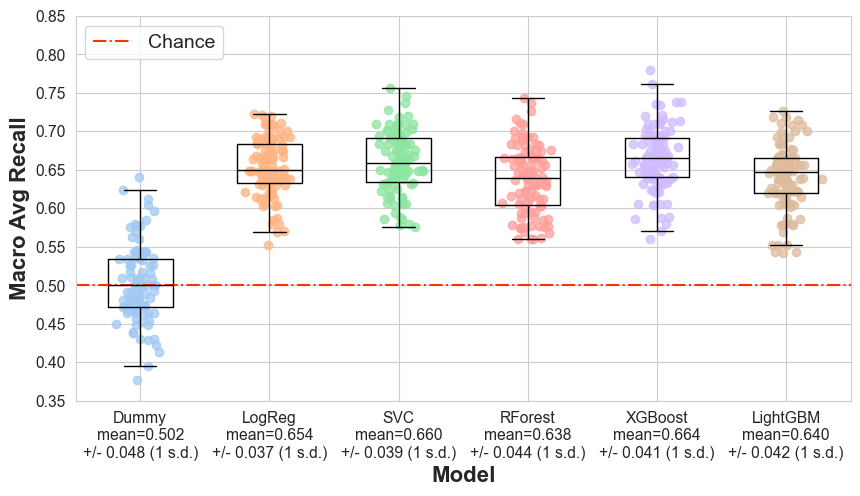

In [76]:
### Plotting all variance predictions as kde plots
models_dict = {
        'Dummy':        dummy_clf,
        'LogReg':       best_logreg_pipe,
        'SVC':          svc_pipe_mwu,
        'RForest':      rf_mwu,
        'XGBoost':      xgb_mwu,
        'LightGBM':     lgbm_mwu,
}

model_preds_dict = {}
model_score_stats = []

recall_macro_scorer = make_scorer(recall_score, average='macro')

for name, model in models_dict.items():

    X_ = X[mwu_features_005_adj] if name != 'Dummy' else X
    y_ = y

    cv_metric_scores = cross_val_score(
                                    estimator = model,
                                    X         = X_,
                                    y         = y_,
                                    n_jobs    = -1,
                                    cv        = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=42),
                                    scoring   = recall_macro_scorer
    )
    model_preds_dict[name] = cv_metric_scores
    model_score_stats.append([name, cv_metric_scores.mean(), cv_metric_scores.std()])


model_preds_df = pd.DataFrame(model_preds_dict)
vals, names, xs = [],[],[]
for i, col in enumerate(model_preds_df.columns):
    vals.append(model_preds_df[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.075, model_preds_df[col].values.shape[0]))  # adds jitter to the data points - can be adjusted (i + 1, 0.04)

# figsize
plt.figure(figsize=(10, 5))
plt.boxplot(vals, labels=names, medianprops={'color':'black'}, showfliers=False)
palette2 = sns.color_palette('pastel')
for x, val, c in zip(xs, vals, palette2):
    plt.scatter(x, val, alpha=0.75, color=c)

#plt.title('Model Perfromance Across Varying Data Splits\n(MWU α < 0.05)', weight='bold')
plt.ylabel('Macro Avg Recall', weight='bold', fontsize=16)
plt.xlabel('Model', weight='bold', fontsize=16)
plt.axhline(y=0.5, color='#ff3300', linestyle='-.', label='Chance')
# Manually set y-axis ticks from 0.35 to 1, in steps of 0.05
plt.yticks(np.arange(0.35, 0.9, 0.05), fontsize=11.25)
# include mean and std in xticklabels and make only name bold:
xticklabels = [f'{name}\nmean={mean:0.3f}\n+/- {std:0.3f} (1 s.d.)' for name, mean, std in model_score_stats]
plt.xticks(ticks=np.arange(1, len(names)+1), labels=xticklabels, fontsize= 11.25, rotation=0)
plt.legend(loc='upper left', fontsize=14)
plt.show();

## 5) **Global Shapley Values**
---
- >`Select model with highest mean in performance metric and least variability!`

##### XGBoost:

[20:12:28] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


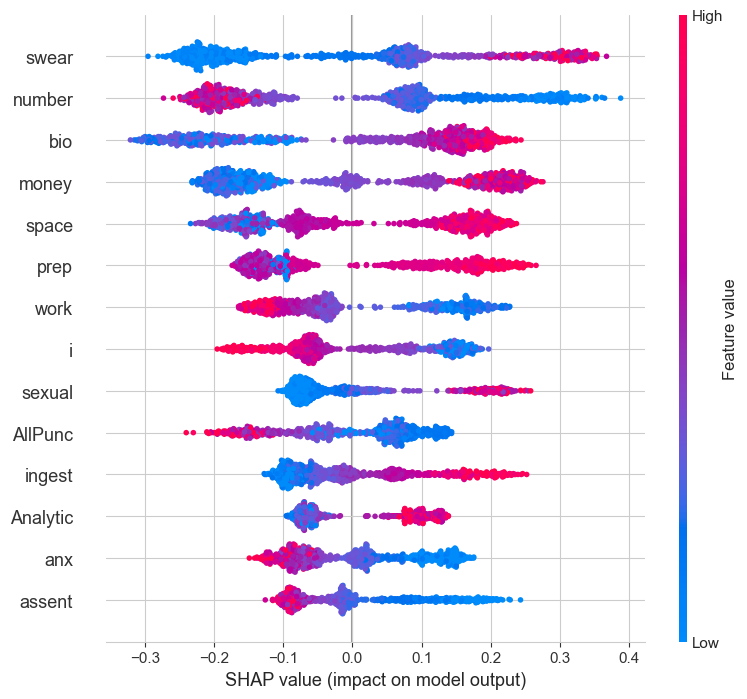

In [36]:
import shap

shap_values = shap.TreeExplainer(xgb_mwu).shap_values(X_train[mwu_features_005_adj])

shap.summary_plot(shap_values, X_train[mwu_features_005_adj], plot_type="dot", max_display=14, show=True)

### Why not working with two colors for xgb but for random forest it works?

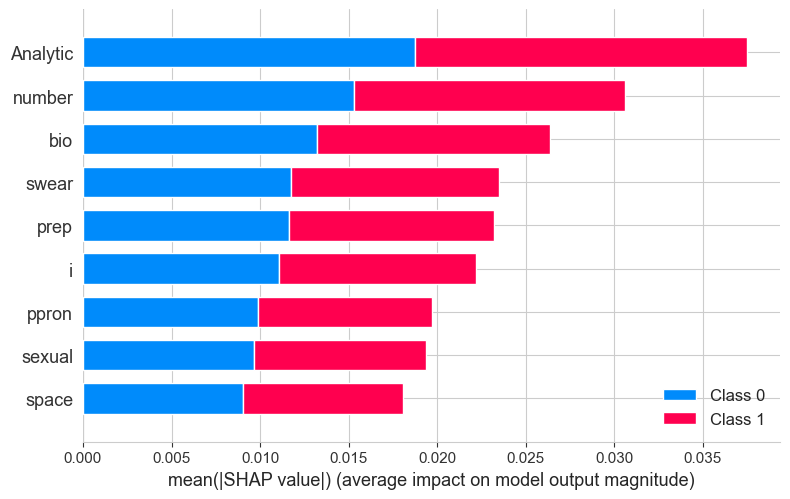

In [56]:
shap_values = shap.TreeExplainer(rf_mwu).shap_values(X_train[mwu_features_005_adj])

shap.summary_plot(shap_values, X_train[mwu_features_005_adj], plot_type="bar", show=True, max_display=9)

[learning_curve] Training set sizes: [ 82 164 246 328 410 492 574 656 738 820]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.7s finished


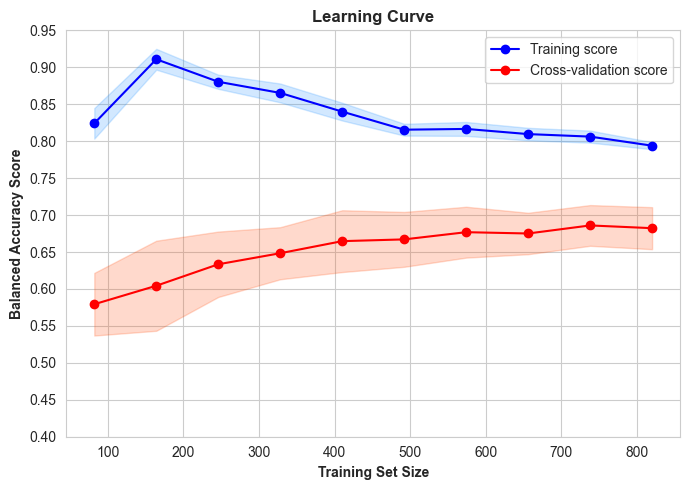

In [33]:
# import learning curve
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, balanced_accuracy_score

# Create CV training and test scores for various training set sizes for XGBoost

train_sizes, train_scores, test_scores = learning_curve(
        estimator   = xgb_mwu,
        X           = X_train[mwu_features_005_adj],
        y           = y_train,
        train_sizes = np.linspace(0.1, 1.0, 10),
        cv          = StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
        scoring     = make_scorer(balanced_accuracy_score),
        n_jobs      = -1,
        verbose     = 1
)

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std  = np.std(test_scores, axis=1)

# Draw lines
plt.subplots(figsize=(7, 5))
plt.plot(train_sizes, train_mean, marker='o', linestyle='-', color="blue",  label="Training score")
plt.plot(train_sizes, test_mean, marker='o', linestyle='-', color="red", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="dodgerblue", alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="orangered", alpha=0.2)

# Create plot
plt.title("Learning Curve", weight='bold')
plt.xlabel("Training Set Size", weight='bold')
plt.ylabel("Balanced Accuracy Score", weight='bold')
plt.yticks(np.arange(0.4, 1.0, 0.05))
plt.legend(loc="best")
plt.tight_layout()
plt.show();


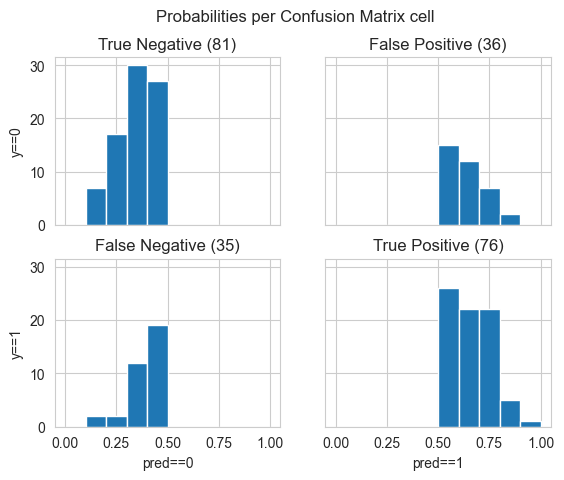

In [55]:
y_pred_proba = xgb_mwu.predict_proba(X_test[mwu_features_005_adj])

df_predictions = pd.DataFrame({'y': y_test, 'y_proba': y_pred_proba[:,1]})
fig, axs = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True)
# show true-pos 

bins = np.arange(0, 1.01, 0.1)

def show_quarter(df, query, col, title, ax, bins, x_label=None, y_label=None):
    results = df.query(query)
    results[col].hist(ax=ax, bins=bins); 
    if y_label:
        ax.set_ylabel(y_label)
    if x_label:
        ax.set_xlabel(x_label)
    ax.set_title(title + " ({})".format(results.shape[0])) #IANBOB

show_quarter(df_predictions, "y==0 and y_proba < 0.5", "y_proba", "True Negative", axs[0][0], bins, y_label="y==0")
show_quarter(df_predictions, "y==0 and y_proba >= 0.5", "y_proba", "False Positive", axs[0][1], bins)
show_quarter(df_predictions, "y==1 and y_proba >= 0.5", "y_proba", "True Positive", axs[1][1], bins, x_label="pred==1")
show_quarter(df_predictions, "y==1 and y_proba < 0.5", "y_proba", "False Negative", axs[1][0], bins, x_label="pred==0", y_label="y==1")
fig.suptitle("Probabilities per Confusion Matrix cell");

#### SVC:

[learning_curve] Training set sizes: [ 82 164 246 328 410 492 574 656 738 820]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.9s finished


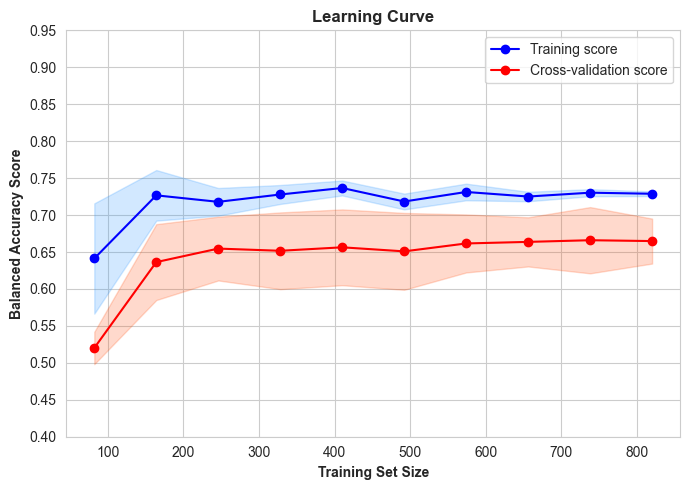

In [49]:
# import learning curve
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, balanced_accuracy_score

# Create CV training and test scores for various training set sizes for XGBoost

train_sizes, train_scores, test_scores = learning_curve(
        estimator   = svc_pipe_mwu,
        X           = X_train[mwu_features_005_adj],
        y           = y_train,
        train_sizes = np.linspace(0.1, 1.0, 10),
        cv          = StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
        scoring     = make_scorer(balanced_accuracy_score),
        n_jobs      = -1,
        verbose     = 1
)

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std  = np.std(test_scores, axis=1)

# Draw lines
plt.subplots(figsize=(7, 5))
plt.plot(train_sizes, train_mean, marker='o', linestyle='-', color="blue",  label="Training score")
plt.plot(train_sizes, test_mean, marker='o', linestyle='-', color="red", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="dodgerblue", alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="orangered", alpha=0.2)

# Create plot
plt.title("Learning Curve", weight='bold')
plt.xlabel("Training Set Size", weight='bold')
plt.ylabel("Balanced Accuracy Score", weight='bold')
plt.yticks(np.arange(0.4, 1.0, 0.05))
plt.legend(loc="best")
plt.tight_layout()
plt.show();

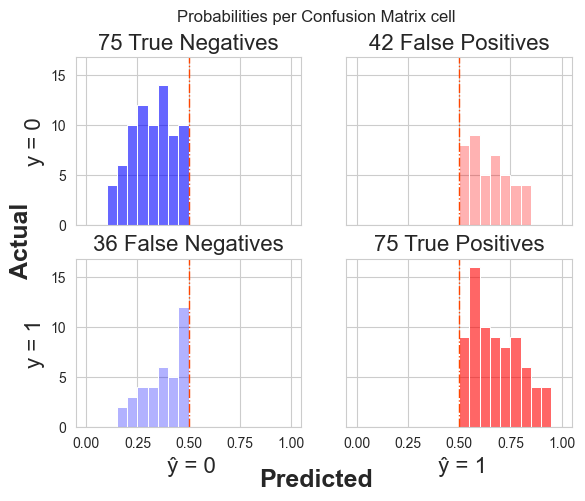

In [11]:
y_pred_proba = svc_pipe_mwu.predict_proba(X_test[mwu_features_005_adj])

df_predictions = pd.DataFrame({'y': y_test, 'y_proba': y_pred_proba[:,1]})
fig, axs = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True)
# show true-pos

bins = np.arange(0, 1.01, 0.05)

def show_quarter(df, query, col, title, ax, bins, color, alpha, x_label=None, y_label=None):
    results = df.query(query)
    #results[col].hist(ax=ax, bins=bins);
    sns.histplot(results[col], kde=False, ax=ax, bins=bins, color=color, alpha=alpha)
    if y_label:
        ax.set_ylabel(y_label, fontsize=16)
    if x_label:
        ax.set_xlabel(x_label, fontsize=16)
    #ax.set_title(title + " ({})".format(results.shape[0]), fontsize=16)
    ax.set_title(f'{results.shape[0]} {title}', fontsize=16)
    # vertical line at 0.5
    ax.axvline(x=0.5, color='orangered', linestyle='-.', linewidth=1)

show_quarter(df_predictions, " y==0 and y_proba < 0.5", "y_proba", "True Negatives", axs[0][0], bins, color='blue', alpha=0.6, y_label="y = 0")
show_quarter(df_predictions, " y==0 and y_proba >= 0.5", "y_proba", "False Positives", axs[0][1], bins, color='red', alpha=0.3)
show_quarter(df_predictions, " y==1 and y_proba >= 0.5", "y_proba", "True Positives", axs[1][1], bins, color='red', alpha=0.6, x_label=" ŷ = 1")
show_quarter(df_predictions, " y==1 and y_proba < 0.5", "y_proba", "False Negatives", axs[1][0], bins, x_label=" ŷ = 0", color='blue', alpha=0.3, y_label="y = 1")

# Set common labels
fig.text(0.5, 0.000001, 'Predicted', ha='center', va='center', fontsize=18, weight='bold')
fig.text(0.04, 0.5, 'Actual', ha='center', va='center', rotation='vertical', fontsize=18, weight='bold')


fig.suptitle("Probabilities per Confusion Matrix cell");